In [98]:
import os
import numpy as np
import matplotlib.pyplot as plt
from colour import Color
import matplotlib.patches as ptc
from scipy.signal import lfilter

# Plotting the Coincidence Detection experiment from Simone

In [65]:
# Loading the data
action = 'separate'
f = np.load(os.path.join(r'C:\Users\SD272961\Documents\Dendrites\Images\Measures\CD', '{0}_ms_v1.npz'.format(action)))
input = f['arr_0']
delays = f['arr_1']
weighted = f['arr_2']
mem_sim = f['arr_3']
spk_sim = f['arr_4']
mem_meas = f['arr_5']
spk_meas = f['arr_6']
f_norm = np.load(os.path.join(r'C:\Users\SD272961\Documents\Dendrites\Images\Measures\CD', '{0}_ms_Inorm_v1.npz'.format(action)))
curr_norm = f_norm['arr_0']
print(weighted.shape[1])
print(curr_norm.shape[0])


input[0, :] = input[0, :]/1e3
delays[0, :] = delays[0, :]/1e3
weighted[0, :] = weighted[0, :]/1e3
mem_sim[0, :] = mem_sim[0, :]/1e3
spk_sim[0, :] = spk_sim[0, :]/1e3
mem_meas[0, :] = mem_meas[0, :]/1e3
spk_meas[0, :] = spk_meas[0, :]/1e3


226786
226786


input[0, :] => time already in µs
input[1, :] => amplitude in V ch1
input[2, :] => amplitude in V ch2
spk48[0, :] => time already in µs
spk48[1, :] => amplitude in V ch1
spk48[2, :] => amplitude in V ch2
weighted[0, :] => time already in µs
weighted[1, :] => amplitude already in µA ch1
weighted[2, :] => amplitude already in µA ch2
mem_sim[0, :] => time already in µs
mem_sim[1, :] => amplitude in V
spk_sim[0, :] => time already in µs
spk_sim[1, :] => amplitude in V
mem_meas[0, :] => time already in µs
mem_meas[1, :] => amplitude in V
spk_meas[0, :] => time already in µs
spk_meas[1, :] => amplitude in V

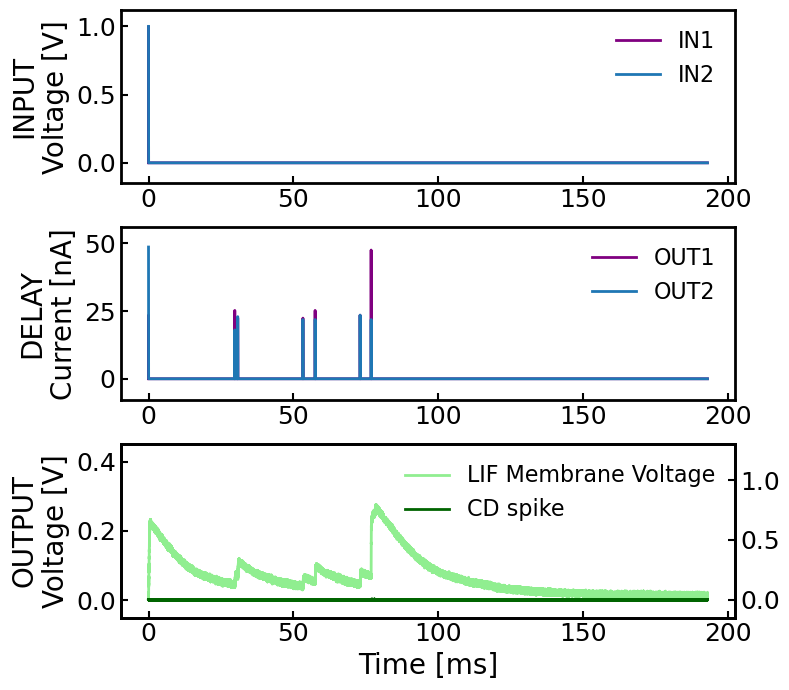

In [66]:
max_time_plot = mem_meas[0, :].max()

fig, ax = plt.subplots( 3,1, figsize=(8, 7) )
# Input
idx_plot = np.where( input[0,:] < max_time_plot )[0]
ax[0].plot( input[0,idx_plot], input[1,idx_plot], lw=2., color='purple', label='IN1' )
ax[0].plot( input[0,idx_plot], input[2,idx_plot], lw=2., color='tab:blue', label='IN2' )
ax[0].legend( prop={'size':16}, frameon=False )
ax[0].set_ylabel( 'INPUT\nVoltage [V]', size=20 )
ax[0].set_ylim((-0.15, 1.12))

# Delays
idx_plot = np.where( weighted[0,:] < max_time_plot )[0]
# weighted[1] = ( weighted[1]/ max(weighted[1]) )*1.0
# print(weighted[1, idx_plot])
# weighted[1, :4] = 0
# weighted[2] = ( weighted[2]/ max(weighted[2]) )*1.0
# weighted[2, :165] = 0
ax[1].plot( weighted[0,idx_plot], curr_norm[idx_plot,0]*1e9, lw=2., color='purple', label='OUT1' )
ax[1].plot( weighted[0,idx_plot], curr_norm[idx_plot,1]*1e9, lw=2., color='tab:blue', label='OUT2' )
ax[1].legend( prop={'size':16}, frameon=False )
ax[1].set_ylabel( 'DELAY\nCurrent' + r' [nA]', size=20 )
ax[1].set_ylim((-8, 56))

# Output
idx_plot = np.where( mem_meas[0,:] < max_time_plot )[0]
idx_suppress = np.where( np.abs( spk_meas[1,:]<0.35 ) )[0]
spk_meas[1,idx_suppress] = spk_meas[1,idx_suppress]/50
ax_spk = ax[2].twinx()
ln1 = ax[2].plot( mem_meas[0,idx_plot], mem_meas[1,idx_plot]-mem_meas[1,idx_plot].min(), lw=2., color='lightgreen', label='LIF Membrane Voltage' )
ln2 = ax_spk.plot( spk_meas[0,idx_plot], spk_meas[1,idx_plot], lw=2., color='darkgreen', label='CD spike' )
lns = ln1 + ln2
labs = [l.get_label() for l in lns]
ax[2].legend( lns, labs, prop={'size':16}, frameon=False )
ax[2].set_ylabel( 'OUTPUT\nVoltage [V]', size=20 )
ax[2].set_xlabel( r'Time [ms]', size=20 )
ax_spk.set_ylim((-0.15, 1.3))
ax[2].set_ylim((-0.05, 0.45))
ax = np.append(ax, ax_spk)
for i in range(len(ax)):
    ax[i].tick_params( labelsize=18, size=5, width=1.5, direction='in' )
    ax[i].grid( False )
    for axis in ['top','bottom','left','right']:
        ax[i].spines[axis].set_linewidth(2)

plt.tight_layout()
file_save = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Figure3\CD_{0}.pdf'.format(action)
fig.savefig( file_save, transparent=True, dpi=300 )

# Plotting the Current Measurement

In [98]:
def smoothen( y, alpha=0.9 ):
    y_smooth = np.zeros_like(y)
    for i in range(1,len(y)):
        y_smooth[i] = y_smooth[i-1]*alpha + y[i]
    return y_smooth - y_smooth[:1000].mean()

In [99]:
f_HCS = np.load(os.path.join(r'C:\Users\SD272961\Documents\Dendrites\Test\Oscilloscope', 'HCS.npz'))
input = f_HCS['arr_0']
spk48 = f_HCS['arr_1']
current_HCS = f_HCS['arr_2']

f_LCS = np.load(os.path.join(r'C:\Users\SD272961\Documents\Dendrites\Test\Oscilloscope', 'LCS.npz'))
input = f_LCS['arr_0']
spk48 = f_LCS['arr_1']
current_LCS = f_LCS['arr_2']

f_Del = np.load(os.path.join(r'C:\Users\SD272961\Documents\Dendrites\Test\Oscilloscope\Wafer23\dels.npz'))
dels = f_Del['arr_0']

current_HCS_smooth = smoothen( current_HCS[1,:], alpha=0.99 )
current_LCS_smooth = smoothen( current_LCS[1,:], alpha=0.99 )

max_current = max( [max(current_HCS_smooth), max(current_LCS_smooth)] )

input[0, :] => time already in µs
input[1, :] => amplitude in V
spk48[0, :] => time already in µs
spk48[1, :] => amplitude in V
current[0, :] => time already in µs
current[1, :] => amplitude already in mA

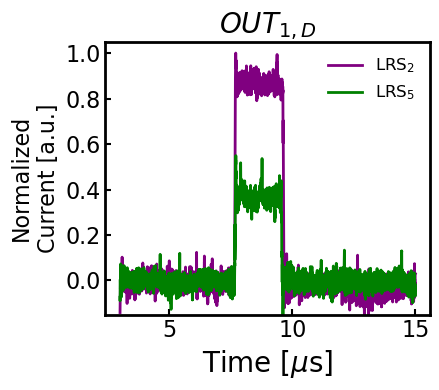

In [101]:
fig, ax = plt.subplots( figsize=(4.5, 4) )
# Current
current_HCS_smooth = smoothen( current_HCS[1,:], alpha=0.99 )
ax.plot( current_HCS[0,:]+5, current_HCS_smooth/max_current, lw=2., color='purple', label=r'LRS$_2$' )
current_LCS_smooth = smoothen( current_LCS[1,:], alpha=0.99 )
ax.plot( current_LCS[0,:]+5, current_LCS_smooth/max_current, lw=2., color='green', label=r'LRS$_5$' )
#ax.legend( prop={'size':15} )
ax.set_ylim( -0.15, 1.05 )
ax.set_ylabel( 'Normalized\nCurrent [a.u.]', size=16 )
ax.set_title( r'$OUT_{1,D}$', size=20 )
ax.tick_params( labelsize=16, size=4, width=1.5, direction='in' )
ax.set_xlabel( r'Time [$\mu$s]', size=20 )
ax.legend(frameon=False, fontsize=12, loc='upper right')
for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)

plt.tight_layout()
file_save_HCS = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Figure2\CD_plot_current_HCS.pdf'
fig.savefig( file_save_HCS, transparent=True, dpi=300 )

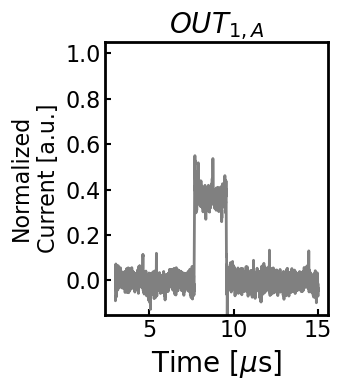

In [6]:
fig, ax = plt.subplots( figsize=(4.5, 4) )
# Current
current_LCS_smooth = smoothen( current_LCS[1,:], alpha=0.99 )
ax.plot( current_LCS[0,:]+5, current_LCS_smooth/max_current, lw=2., color='grey' )
#ax.legend( prop={'size':15} )
ax.set_ylim( -0.15, 1.05 )
ax.set_ylabel( 'Normalized\nCurrent [a.u.]', size=16 )
ax.set_title( r'$OUT_{1,A}$', size=20 )
ax.tick_params( labelsize=16, size=4, width=1.5, direction='in' )
ax.set_xlabel( r'Time [$\mu$s]', size=20 )
for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)

plt.tight_layout()
file_save_LCS = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Figure2\CD_plot_current_LCS.pdf'
fig.savefig( file_save_LCS, transparent=True, dpi=300 )

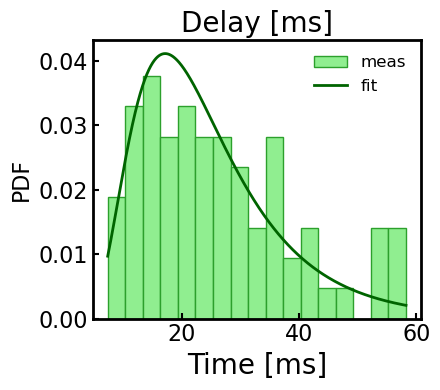

In [100]:
r_sigma = 0.5
r_mu = 22
normal_std = np.sqrt(np.log(1 + (r_sigma / r_mu) ** 2))
normal_mean = np.log(r_mu) - normal_std ** 2 / 2
normal_std = r_sigma
x = np.linspace(dels.min()*1e3, dels.max()*1e3, num=1000)
pdf = (np.exp(-(np.log(x) - normal_mean) ** 2 / (2 * normal_std ** 2)) / (x * normal_std * np.sqrt(2 * np.pi)))
    
fig, ax = plt.subplots( figsize=(4.5, 4) )
# Current
#current_LCS_smooth = smoothen( current_LCS[1,:], alpha=0.99 )
ax.hist( dels*1e3, color='lightgreen', edgecolor='tab:green', bins=int(dels.shape[0]/4), density=True, label='meas' )
#ax.legend( prop={'size':15} )
#ax.set_ylim( -0.15, 1.05 )
ax.plot(x, pdf, lw=2, color='darkgreen', label='fit')
ax.set_ylabel( 'PDF', size=16 )
ax.set_title( r'Delay [ms]', size=20 )
ax.tick_params( labelsize=16, size=4, width=1.5, direction='in' )
ax.set_xlabel( r'Time [ms]', size=20 )
ax.legend(frameon=False, fontsize=12)
for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)

plt.tight_layout()
file_save_PDF = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Figure2\delays_pdf.pdf'
fig.savefig( file_save_PDF, transparent=True, dpi=300 )

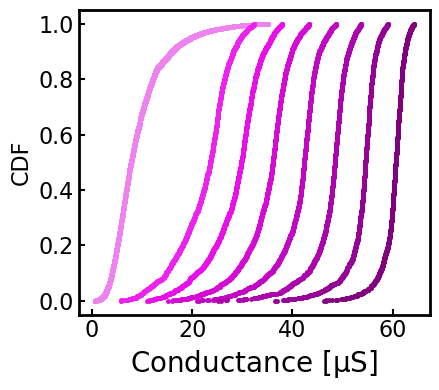

In [32]:
root = r'C:\Users\SD272961\Documents\Dendrites\Test\MAD200v6_multilevel\Multilevel'
f_tmplt = 'LXX_W0_SC12_X6_Y3_P0_Multistatic_READ_end_'
files = []
files.append(os.path.join(r'C:\Users\SD272961\Documents\Dendrites\Test\MAD200v6_multilevel\DOE',
                          'LXX_W0_SC12_X6_Y3_P0_DOE_condition_7_0.dat'))
for i in range(1, 8):
    f = f_tmplt + '{0}.dat'.format(i)
    files.append(os.path.join(root, f))
m = []
for i, f in enumerate(files):
    if i > 0:
        m.append(np.genfromtxt(f)[:, -1])
    else:
        m.append(np.genfromtxt(f)[:, 4])
purple_green_fade = list(Color("violet").range_to(Color("purple"), len(files)+3))
fig, ax = plt.subplots( figsize=(4.5, 4) )
idx = 0
for i, mat in enumerate(m):
    x = np.sort(1/mat)[10:-140]
    y = np.arange(mat.shape[0]-150)/float(mat.shape[0]-150)
    ax.plot(x*1e6, y, lw=2.5, color=purple_green_fade[i+idx].hex, ls='None', marker='o', ms=2.5,
            markeredgecolor=purple_green_fade[i+idx].hex, markerfacecolor=purple_green_fade[i+idx].hex)
    if idx < 3:
        idx = 3
ax.set_ylabel('CDF', size=16)
ax.set_xlabel(r'Conductance [$\mathrm{\mu}$S]', size=20)
ax.tick_params( labelsize=16, size=4, width=1.5, direction='in' )
for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)

plt.tight_layout()
file_save_PDF = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Figure2\weights_pdf.pdf'
fig.savefig( file_save_PDF, transparent=True, dpi=300 )

[0.07150331]


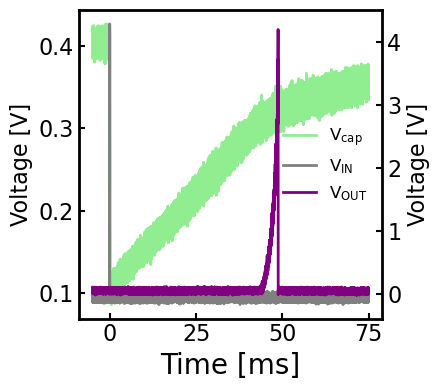

In [92]:
a = np.load(r'C:\Users\SD272961\Documents\Dendrites\Test\Oscilloscope\Wafer23\Wafer23.npy', allow_pickle=True)
idx = 26
time = a[idx][0][:, 0]
time_eff = (time > -5e-3)
time = time[time_eff]
n = 15  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
c = 1
spk_in = lfilter(b, c, a[idx][0][time_eff, 1])
v_cap = lfilter(b, c, a[idx][0][time_eff, 2])
v_out = lfilter(b, c, a[idx][0][time_eff, 3])
t_max = 75e-3
print(time[time<t_max][v_out[time<t_max]==v_out[time<t_max].max()])
fig, ax = plt.subplots(figsize=(4.5, 4))
ln1 = ax.plot(time[time<t_max][100:]*1e3, v_cap[time<t_max][100:], color='lightgreen', label=r'V$_{\mathrm{cap}}$', lw=2)
secax = ax.twinx()
ln2 = secax.plot(time[time<t_max][100:]*1e3, spk_in[time<t_max][100:]/1.5, color='grey', label=r'V$_{\mathrm{IN}}$', lw=2)
ln3 = secax.plot(time[time<t_max][100:]*1e3, -v_out[time<t_max][100:]+4.8, color='purple', label=r'V$_{\mathrm{OUT}}$', lw=2)

ax.set_ylabel( 'Voltage [V]', size=16 )
secax.set_ylabel( 'Voltage [V]', size=16 )
ax.tick_params( labelsize=16, size=4, width=1.5, direction='in' )
secax.tick_params( labelsize=16, size=4, width=1.5, direction='in' )
ax.set_xlabel( r'Time [ms]', size=20 )
lns = ln1 + ln2 + ln3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, frameon=False, loc='center right', fontsize=14)
for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
plt.tight_layout()

file_save_PDF = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Figure2\dendrite.pdf'
fig.savefig( file_save_PDF, transparent=True, dpi=300 )

# Parameter count VS Accuracy: RSNN and Delays
---

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
from scipy.optimize import curve_fit

def power_law( x, a, b, c, d ):
    return a*( (x-b)**(1/c) )+d

def exponential_law( x, a, b, c, d ):
    return a * np.exp( -(x-b)/c ) + d

def log_law(x, a, b, c, d):
    return a * np.log( (x-b)/c ) + d

def tanh_law(x, a, b, c, d):
    return a * np.tanh( (x-b)/c ) + d

In [17]:
### RSNNs: data from Cramer et. al. 2022
# https://ieeexplore.ieee.org/document/9311226
rsnn_params = lambda x: 700*x + x**2 + x*20 # 700 inputs, x recurrent, 20 outputs
RSNN_neurons = np.array([ 128, 256, 512, 1024])
RSNN_params = rsnn_params( RSNN_neurons )
RSNN_accuracy = np.array([ 71.4, 73.5, 75.5, 76.5 ])
# curve_fit
popt_rsnn, _ = curve_fit( power_law, RSNN_params, RSNN_accuracy, bounds=([-np.inf, -np.inf, 0, -np.inf], [np.inf, np.inf, np.inf, np.inf])  )

### Delay based
Delay_theory_params = np.array([1e10])
Delay_theory_accuracy = np.array([99.9999])
# https://ieeexplore.ieee.org/abstract/document/10181778/
Delay_IMEC_params   = np.array([ 66240, 98560 ])
Delay_IMEC_accuracy = np.array([ 90.1, 90.4 ])
# https://arxiv.org/abs/2306.17670
Delay_CNRS_params   = np.array([ 200000 ])
Delay_CNRS_accuracy = np.array([ 95.1 ])
# https://ieeexplore.ieee.org/abstract/document/10094768
Delay_WAVES_params   = np.array([ 109076 ])
Delay_WAVES_accuracy = np.array([ 92.5 ])
# our work
Delay_OUR_params   = np.array([ 64*4*2, 64*25*2 ])
Delay_OUR_accuracy = np.array([ 70.0, 75 ])
# total
Delay_tot_params   = np.concatenate( (Delay_OUR_params, Delay_IMEC_params, Delay_WAVES_params, Delay_CNRS_params) )
Delay_tot_accuracy = np.concatenate( (Delay_OUR_accuracy, Delay_IMEC_accuracy, Delay_WAVES_accuracy, Delay_CNRS_accuracy ) )
# curve_fit
popt_delays, _ = curve_fit( power_law, Delay_tot_params, Delay_tot_accuracy, bounds=([-np.inf, -np.inf, 0, -np.inf], [np.inf, np.inf, np.inf, np.inf])  )
print(popt_delays)

[ 20052.65983847  -1063.89183694   3874.86871147 -20020.83720955]


C:\Users\SD272961\Anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


C:\Users\SD272961\AppData\Local\Temp\ipykernel_3692\4099676656.py:4: RuntimeWarning: invalid value encountered in power
  return a*( (x-b)**(1/c) )+d


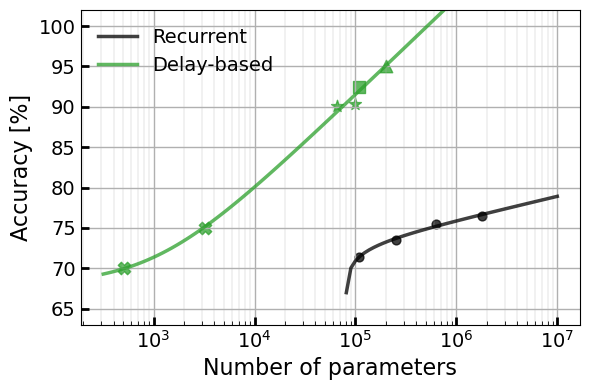

In [16]:
fig, ax = plt.subplots( figsize=(6, 4) )
x_num_params = np.logspace( 2.5, 7, 100 )
# RSNN
ax.scatter( RSNN_params, RSNN_accuracy, marker='o', s=40, color='k', alpha=0.75 )
ax.plot( x_num_params, power_law( x_num_params, popt_rsnn[0], popt_rsnn[1], popt_rsnn[2], popt_rsnn[3] ), color='k', alpha=0.75, lw=2.5, label='Recurrent' )
# Delay
ax.scatter( Delay_IMEC_params, Delay_IMEC_accuracy, marker='*', s=80, color='tab:green', alpha=0.75 )
ax.scatter( Delay_CNRS_params, Delay_CNRS_accuracy, marker='^', s=80, color='tab:green', alpha=0.75 )
ax.scatter( Delay_WAVES_params, Delay_WAVES_accuracy, marker='s', s=80, color='tab:green', alpha=0.75 )
ax.scatter( Delay_OUR_params, Delay_OUR_accuracy, marker='X', s=80, color='tab:green', alpha=0.75 )
ax.plot( x_num_params, power_law( x_num_params, *popt_delays ), color='tab:green', alpha=0.75, lw=2.5, label='Delay-based' )
ax.set_xscale('log')
ax.set_xlabel( 'Number of parameters', size=16 )
ax.set_ylabel( 'Accuracy [%]', size=16 )
ax.tick_params( which = 'major', direction='in', size=6, width=2, labelsize=14)
ax.tick_params( which = 'minor', direction='in', size=3 )
ax.grid( which='major', linewidth=1 )
ax.grid( which='minor', linewidth=0.25 )
ax.set_ylim( 63, 102 )
ax.legend( prop={'size':14}, frameon=False )
plt.tight_layout()
fig.savefig( r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Figure4\Delay_Recurrent.pdf', transparent=True )


# Accuracy MIT-BIH

In [79]:
root = r'Results\accDelay'
dir = r'C:\Users\SD272961\Documents\Dendrites\Thesis'
f_pre = os.path.join(dir, root)
f_post = 'fromData0d50_16.npz'
f = os.path.join(dir, root, f_pre, f_post)
data = np.load(f)
res = np.array([0, 1e9, 2e9, 3e9, 4e9, 5e9, 6e9, 7e9, 8e9, 9e9, 1e10, 2e10, 3e10, 4e10, 5e10, 6e10, 7e10, 8e10, 9e10, 
                1e11, 2e11, 3e11, 4e11, 5e11])  # ohm
acc33 = data['arr_0']
acc42 = data['arr_1']
acc69 = data['arr_2']
acc97 = data['arr_3']
acc98 = data['arr_4']
acc_mean = (acc33 + acc42 + acc69 + acc97 + acc98) / 5
acc = np.stack((acc33, acc42, acc69, acc97, acc98), axis=1)
for i in range(len(res)):
    print('mean tau = %dms, mean R = %Eohm; mean accuracy = %.4f' % (res[i]*0.66e-9, res[i], acc_mean[i]))
R = res[8:]
acc_uni = acc_mean[8:]
acc = acc[8:]

print('mean tau = %dms, mean R = %Eohm; mean accuracy = %.4f' % (R[5]*0.66e-9, R[5], acc_uni[5]))

mean tau = 0ms, mean R = 0.000000E+00ohm; mean accuracy = 0.8779
mean tau = 0ms, mean R = 1.000000E+09ohm; mean accuracy = 0.8779
mean tau = 1ms, mean R = 2.000000E+09ohm; mean accuracy = 0.8493
mean tau = 1ms, mean R = 3.000000E+09ohm; mean accuracy = 0.8418
mean tau = 2ms, mean R = 4.000000E+09ohm; mean accuracy = 0.8024
mean tau = 3ms, mean R = 5.000000E+09ohm; mean accuracy = 0.8792
mean tau = 3ms, mean R = 6.000000E+09ohm; mean accuracy = 0.8948
mean tau = 4ms, mean R = 7.000000E+09ohm; mean accuracy = 0.8198
mean tau = 5ms, mean R = 8.000000E+09ohm; mean accuracy = 0.8074
mean tau = 5ms, mean R = 9.000000E+09ohm; mean accuracy = 0.8199
mean tau = 6ms, mean R = 1.000000E+10ohm; mean accuracy = 0.8559
mean tau = 13ms, mean R = 2.000000E+10ohm; mean accuracy = 0.9398
mean tau = 19ms, mean R = 3.000000E+10ohm; mean accuracy = 0.9415
mean tau = 26ms, mean R = 4.000000E+10ohm; mean accuracy = 0.9647
mean tau = 33ms, mean R = 5.000000E+10ohm; mean accuracy = 0.9617
mean tau = 39ms, mean

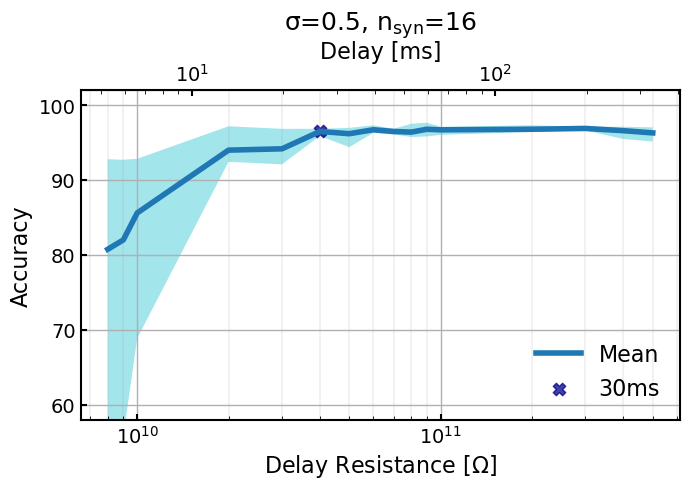

In [82]:
spk2del = lambda a: a * 0.66e-9
del2spk = lambda a: a / 0.66e-9

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(R, acc_uni*100, color='tab:blue', lw=4, label='Mean')
ax.fill_between(R, acc.min(axis=1)*100, acc.max(axis=1)*100, color='tab:cyan', alpha=0.4, lw=1.5, edgecolor='none')
ax.scatter( R[5], acc_uni[5]*100, marker='X', s=80, color='darkblue', alpha=0.75, label='30ms' )
ax.set_xlabel(r'Delay Resistance [$\mathrm{\Omega}$]', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)
plt.legend(fontsize=16, frameon=False, loc='lower right')
ax.set_xscale('log')
ax.set_ylim((58, 102))
secaxf = ax.secondary_xaxis('top', functions=(spk2del, del2spk))
ax.grid(linewidth=1, which='major')
ax.grid(linewidth=0.25, which='minor')
secaxf.set_xlabel('Delay [ms]', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14, width=1.5, length=4, direction='in')
ax.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
secaxf.tick_params(axis='both', which='major', labelsize=14, width=1.5, length=4, direction='in')
secaxf.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
ax.spines[:].set_linewidth(1.5)
ax.set_title(r'$\mathrm{\sigma}$=0.5, n$_\mathrm{syn}$=16', fontsize=18)
plt.tight_layout()

file_save = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Figure4\acc_MIT-BIH.pdf'
fig.savefig( file_save, transparent=True, dpi=300 )

# Power-Energy

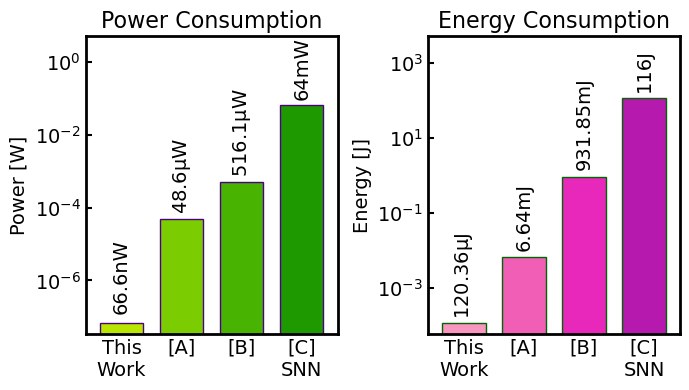

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(7, 4))
energies = np.array([120.36e-6, 6.64e-3, 931.85e-3, 116, 16e3])
power = np.array([66.6e-9, 48.6e-6, 516.1e-6, 64e-3, 8.94])
text_energies = [r'120.36$\mathrm{\mu}$J', '6.64mJ', '931.85mJ', '116J', '16kJ']
text_power = ['66.6nW', '48.6$\mathrm{\mu}$W', '516.1$\mathrm{\mu}$W', '64mW', '8.94W']
# x_lab = ['Dendritic\nNetwork', 'J. Liu\net al., 2021', 'F. C. Bauer\net al., 2019', 'Z. Yan et al.\nSNN, 2021',
#          'Z. Yan et al.\nCNN, 2021']
x_lab = ['This\nWork', '[A]', '[B]', '[C]\nSNN', '[C]\nCNN']
off_power = [0.9e-7, 50e-6, 500e-6, 50e-3, 7]
off_energies = [1e-4, 6e-3, 800e-3, 100, 15e3]
x_pos = np.array([1.5, 4, 6.5, 9, 11.5])
yellow_green_fade = list(Color("#fdd1dc").range_to(Color("#6f147b"), len(x_pos) + 1))
pink_purple_fade = list(Color("yellow").range_to(Color("green"), len(x_pos) + 1))
for i, x in enumerate(x_pos[:-1]):
    ax[0].add_patch(ptc.Rectangle((x-0.9, 0), 1.8, power[i], facecolor=pink_purple_fade[i + 1].hex,
                    edgecolor='indigo'))
    ax[0].text(x, power[i]+off_power[i], text_power[i], fontsize=14, color='k', horizontalalignment='center', rotation='vertical')
    ax[1].add_patch(ptc.Rectangle((x - 0.9, 0), 1.8, energies[i], facecolor=yellow_green_fade[i + 1].hex,
                    edgecolor='darkgreen'))
    ax[1].text(x, energies[i]+off_energies[i], text_energies[i], fontsize=14, color='k', horizontalalignment='center', rotation='vertical')
titles = ['Power Consumption', 'Energy Consumption']
y_label = ['Power [W]', 'Energy [J]']
for i in range(len(ax)):
    ax[i].set_ylabel(y_label[i], fontsize=14)
    ax[i].set_title(titles[i], fontsize=16)
    ax[i].set_xticks(x_pos[:-1], labels=x_lab[:-1])
    ax[i].tick_params(axis='y', which='major', labelsize=14, length=4, width=1.5, direction='in')
    ax[i].tick_params(axis='y', which='minor', labelsize=0, size=3, direction='in')
    ax[i].tick_params(axis='x', labelsize=14, size=0, width=0, direction='in')
    ax[i].set_yscale('log')
    ax[i].set_xlim((0, 10.5))
    ax[i].spines[:].set_linewidth(2)
    
ax[0].set_ylim(top=5)
ax[1].set_ylim(top=5000)
plt.tight_layout()

file_save = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Figure4\poen_MIT-BIH.pdf'
fig.savefig( file_save, transparent=True, dpi=300 )

# Accuracy with Noise

94.43700000000001


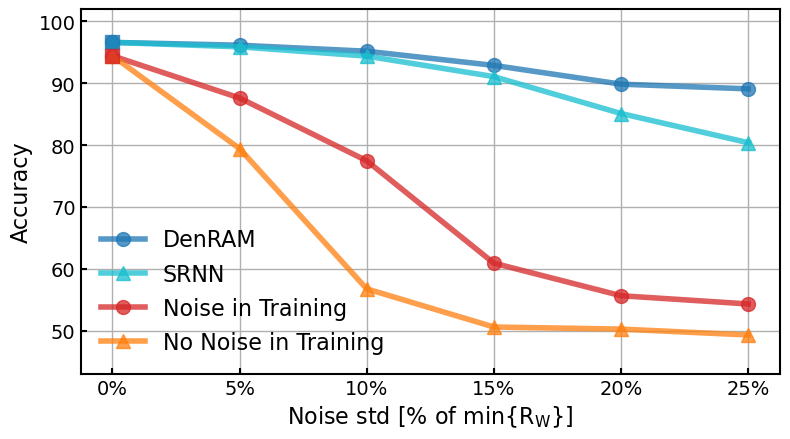

In [69]:
root = r'Results\accDelay'
dir = r'C:\Users\SD272961\Documents\Dendrites\Thesis'
f_pre = os.path.join(dir, root)
fs = ['DenRAM_16Noise2.npz', 'DenRAM_16Noise1.npz', 'SRNN_noise3.npz', 'SRNN_noise4.npz']
acc = []
for f in fs:
    data_tmp = []
    for idx in range(6):
        data_tmp.append(np.load(os.path.join(f_pre, f))['arr_%d' % idx])
    acc.append(np.stack(data_tmp))

perc = np.array([0, 5, 10, 15, 20, 25])
red_blue_fade = ['tab:blue', 'tab:cyan', 'tab:red', 'tab:orange']
fig, ax = plt.subplots(figsize=(8, 4.5))
ax.plot(perc, acc[0][:, :50].mean(axis=1)*100, color=red_blue_fade[0], lw=4, marker='o', markeredgecolor=red_blue_fade[0], 
        markerfacecolor=red_blue_fade[0], label='DenRAM', ms=10, alpha=0.75)
ax.plot(perc, acc[1][:, :50].mean(axis=1)*100, color=red_blue_fade[1], lw=4, marker='^', markeredgecolor=red_blue_fade[1], 
        markerfacecolor=red_blue_fade[1], label='SRNN', ms=10, alpha=0.75)
ax.plot(perc, acc[2][:, :50].mean(axis=1)*100, color=red_blue_fade[2], lw=4, marker='o', markeredgecolor=red_blue_fade[2], 
        markerfacecolor=red_blue_fade[2], label='Noise in Training', ms=10, alpha=0.75)
ax.plot(perc, acc[3][:, :50].mean(axis=1)*100, color=red_blue_fade[3], lw=4, marker='^', markeredgecolor=red_blue_fade[3], 
        markerfacecolor=red_blue_fade[3], label='No Noise in Training', ms=10, alpha=0.75)
ax.plot(perc[0], acc[0][:, :50].mean(axis=1)[0]*100, color=red_blue_fade[0], lw=2, marker='s', markeredgecolor=red_blue_fade[0], 
        markerfacecolor=red_blue_fade[0], ms=10, alpha=0.75)
ax.plot(perc[0], acc[2][:, :50].mean(axis=1)[0]*100, color=red_blue_fade[2], lw=2, marker='s', markeredgecolor=red_blue_fade[2], 
        markerfacecolor=red_blue_fade[2], ms=10, alpha=0.75)
plt.legend(loc='lower left', frameon=False, fontsize=16)
ax.set_ylim((43, 102))
ax.set_xticks(perc, labels=['%d%%' % p for p in perc])
ax.tick_params(axis='both', which='major', labelsize=14, width=1.5, length=4, direction='in')
ax.set_xlabel(r'Noise std [% of min{$\mathrm{R_W}$}]', fontsize=16)
ax.set_ylabel('Accuracy', fontsize=16)
ax.spines[:].set_linewidth(1.5)
ax.grid(linewidth=1)
plt.tight_layout()

print(acc[2][:, :50].mean(axis=1)[0]*100)
file_save = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Figure4\accNoise_MIT-BIH.pdf'
fig.savefig( file_save, transparent=True, dpi=300 )

# Ablation Study

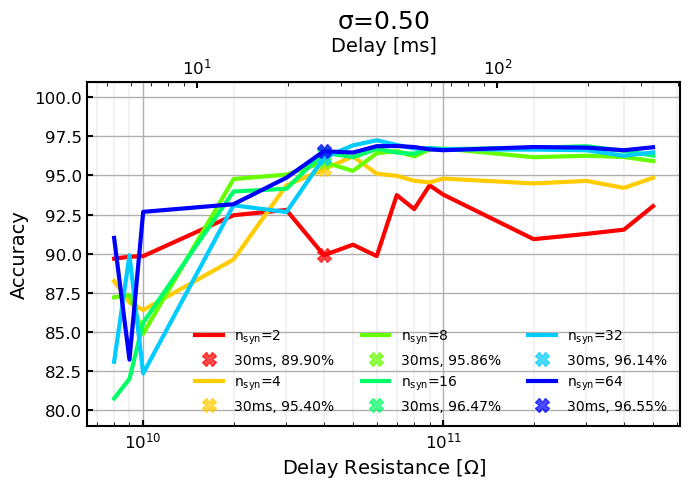

In [93]:
spk2del = lambda a: a * 0.66e-9
del2spk = lambda a: a / 0.66e-9

root = r'Results\accDelay'
dir = r'C:\Users\SD272961\Documents\Dendrites\Thesis'
f_pre = os.path.join(dir, root)
sigma = 0.5
f_posts = ['2.npz', '4.npz', '8.npz', '16.npz', '32.npz', '64.npz']
data33 = []
data42 = []
data69 = []
data97 = []
data98 = []
for p in f_posts:
    data33.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_0'])
    data42.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_1'])
    data69.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_2'])
    data97.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_3'])
    data98.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_4'])
acc_mean = [(data33[i] + data42[i] + data69[i] + data97[i] + data98[i]) / 5 for i in range(len(f_posts))]
acc = np.stack((data33, data42, data69, data97, data98), axis=1)
res = np.array([0, 1e9, 2e9, 3e9, 4e9, 5e9, 6e9, 7e9, 8e9, 9e9, 1e10, 2e10, 3e10, 4e10, 5e10, 6e10, 
                7e10, 8e10, 9e10, 1e11, 2e11, 3e11, 4e11, 5e11])  # ohm
nsyn = [2, 4, 8, 16, 32, 64]
red_blue_fade = list(Color("red").range_to(Color("blue"), len(nsyn)))
fig, ax = plt.subplots(figsize=(7, 5))
for i in range(len(nsyn)):
    ax.plot(res[8:], acc_mean[i][8:]*100, color=red_blue_fade[i].hex, lw=3, label=r'n$_\mathrm{syn}$=%d' % nsyn[i])
    ax.plot(res[res==4e10], acc_mean[i][res==4e10]*100, marker='X', markeredgecolor=red_blue_fade[i].hex, 
            label='30ms, %.2f%%' % (acc_mean[i][res==4e10]*100), alpha=0.7, markerfacecolor=red_blue_fade[i].hex, 
            ms=10, ls='None')
ax.legend(loc='lower right', frameon=False, ncol=3)
ax.set_xscale('log')
secaxf = ax.secondary_xaxis('top', functions=(spk2del, del2spk))
ax.grid(linewidth=1, which='major')
ax.grid(linewidth=0.25, which='minor')
secaxf.set_xlabel('Delay [ms]', fontsize=14)
ax.spines[:].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=4, direction='in')
ax.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
secaxf.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=4, direction='in')
secaxf.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
ax.set_xlabel(r'Delay Resistance [$\mathrm{\Omega}$]', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_ylim((79, 101))
ax.set_title(r'$\mathrm{\sigma}$=%.2f' % sigma, fontsize=18)
plt.tight_layout()

file_save = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Sup2\sigma0d{0}.pdf'.format(int(sigma*100))
fig.savefig( file_save, transparent=True, dpi=300 )

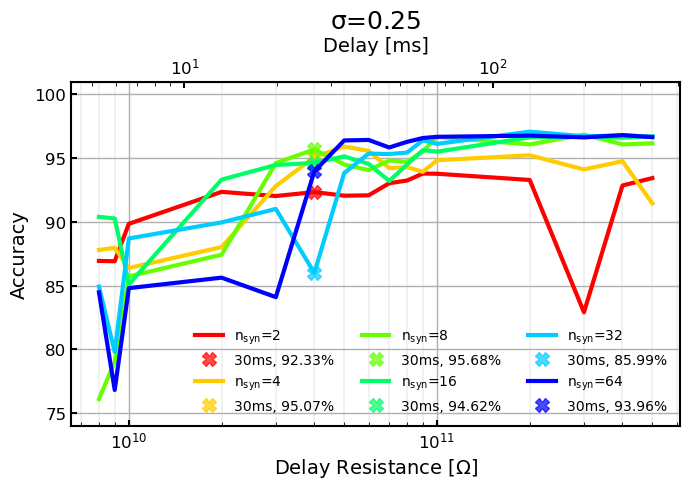

In [92]:
spk2del = lambda a: a * 0.66e-9
del2spk = lambda a: a / 0.66e-9

sigma = 0.25
f_posts = ['2.npz', '4.npz', '8.npz', '16.npz', '32.npz', '64.npz']
data33 = []
data42 = []
data69 = []
data97 = []
data98 = []
for p in f_posts:
    data33.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_0'])
    data42.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_1'])
    data69.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_2'])
    data97.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_3'])
    data98.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_4'])
acc_mean = [(data33[i] + data42[i] + data69[i] + data97[i] + data98[i]) / 5 for i in range(len(f_posts))]
acc = np.stack((data33, data42, data69, data97, data98), axis=1)
res = np.array([0, 1e9, 2e9, 3e9, 4e9, 5e9, 6e9, 7e9, 8e9, 9e9, 1e10, 2e10, 3e10, 4e10, 5e10, 6e10, 
                7e10, 8e10, 9e10, 1e11, 2e11, 3e11, 4e11, 5e11])  # ohm
nsyn = [2, 4, 8, 16, 32, 64]
red_blue_fade = list(Color("red").range_to(Color("blue"), len(nsyn)))
fig, ax = plt.subplots(figsize=(7, 5))
for i in range(len(nsyn)):
    ax.plot(res[8:], acc_mean[i][8:]*100, color=red_blue_fade[i].hex, lw=3, label=r'n$_\mathrm{syn}$=%d' % nsyn[i])
    ax.plot(res[res==4e10], acc_mean[i][res==4e10]*100, marker='X', markeredgecolor=red_blue_fade[i].hex, 
            label='30ms, %.2f%%' % (acc_mean[i][res==4e10]*100), alpha=0.7, markerfacecolor=red_blue_fade[i].hex, 
            ms=10, ls='None')
ax.legend(loc='lower right', frameon=False, ncol=3)
ax.set_xscale('log')
secaxf = ax.secondary_xaxis('top', functions=(spk2del, del2spk))
ax.grid(linewidth=1, which='major')
ax.grid(linewidth=0.25, which='minor')
secaxf.set_xlabel('Delay [ms]', fontsize=14)
ax.spines[:].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=4, direction='in')
ax.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
secaxf.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=4, direction='in')
secaxf.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
ax.set_xlabel(r'Delay Resistance [$\mathrm{\Omega}$]', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_ylim((74, 101))
ax.set_title(r'$\mathrm{\sigma}$=%.2f' % sigma, fontsize=18)
plt.tight_layout()

file_save = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Sup2\sigma0d{0}.pdf'.format(int(sigma*100))
fig.savefig( file_save, transparent=True, dpi=300 )

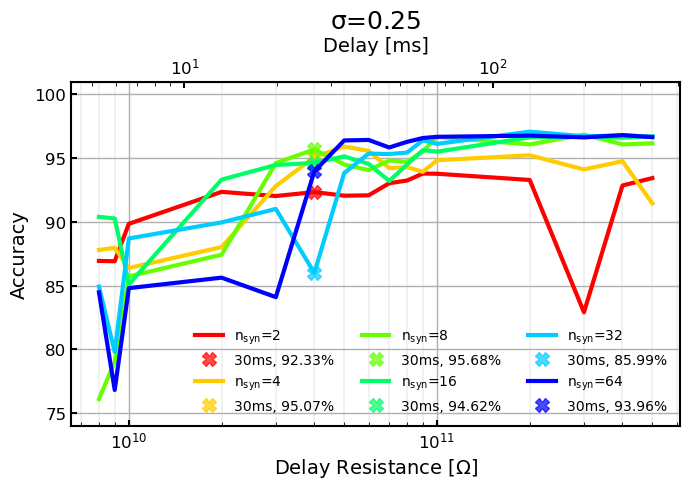

In [91]:
spk2del = lambda a: a * 0.66e-9
del2spk = lambda a: a / 0.66e-9

sigma = 0.25
f_posts = ['2.npz', '4.npz', '8.npz', '16.npz', '32.npz', '64.npz']
data33 = []
data42 = []
data69 = []
data97 = []
data98 = []
for p in f_posts:
    data33.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_0'])
    data42.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_1'])
    data69.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_2'])
    data97.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_3'])
    data98.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_4'])
acc_mean = [(data33[i] + data42[i] + data69[i] + data97[i] + data98[i]) / 5 for i in range(len(f_posts))]
acc = np.stack((data33, data42, data69, data97, data98), axis=1)
res = np.array([0, 1e9, 2e9, 3e9, 4e9, 5e9, 6e9, 7e9, 8e9, 9e9, 1e10, 2e10, 3e10, 4e10, 5e10, 6e10, 
                7e10, 8e10, 9e10, 1e11, 2e11, 3e11, 4e11, 5e11])  # ohm
nsyn = [2, 4, 8, 16, 32, 64]
red_blue_fade = list(Color("red").range_to(Color("blue"), len(nsyn)))
fig, ax = plt.subplots(figsize=(7, 5))
for i in range(len(nsyn)):
    ax.plot(res[8:], acc_mean[i][8:]*100, color=red_blue_fade[i].hex, lw=3, label=r'n$_\mathrm{syn}$=%d' % nsyn[i])
    ax.plot(res[res==4e10], acc_mean[i][res==4e10]*100, marker='X', markeredgecolor=red_blue_fade[i].hex, 
            label='30ms, %.2f%%' % (acc_mean[i][res==4e10]*100), alpha=0.7, markerfacecolor=red_blue_fade[i].hex, 
            ms=10, ls='None')
ax.legend(loc='lower right', frameon=False, ncol=3)
ax.set_xscale('log')
secaxf = ax.secondary_xaxis('top', functions=(spk2del, del2spk))
ax.grid(linewidth=1, which='major')
ax.grid(linewidth=0.25, which='minor')
secaxf.set_xlabel('Delay [ms]', fontsize=14)
ax.spines[:].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=4, direction='in')
ax.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
secaxf.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=4, direction='in')
secaxf.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
ax.set_xlabel(r'Delay Resistance [$\mathrm{\Omega}$]', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_ylim((74, 101))
ax.set_title(r'$\mathrm{\sigma}$=%.2f' % sigma, fontsize=18)
plt.tight_layout()

file_save = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Sup2\sigma0d{0}.pdf'.format(int(sigma*100))
fig.savefig( file_save, transparent=True, dpi=300 )

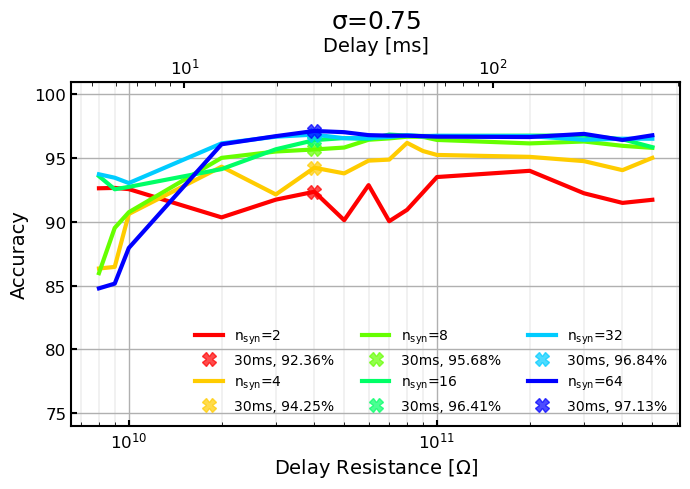

In [90]:
spk2del = lambda a: a * 0.66e-9
del2spk = lambda a: a / 0.66e-9

sigma = 0.75
f_posts = ['2.npz', '4.npz', '8.npz', '16.npz', '32.npz', '64.npz']
data33 = []
data42 = []
data69 = []
data97 = []
data98 = []
for p in f_posts:
    data33.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_0'])
    data42.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_1'])
    data69.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_2'])
    data97.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_3'])
    data98.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_4'])
acc_mean = [(data33[i] + data42[i] + data69[i] + data97[i] + data98[i]) / 5 for i in range(len(f_posts))]
acc = np.stack((data33, data42, data69, data97, data98), axis=1)
res = np.array([0, 1e9, 2e9, 3e9, 4e9, 5e9, 6e9, 7e9, 8e9, 9e9, 1e10, 2e10, 3e10, 4e10, 5e10, 6e10, 
                7e10, 8e10, 9e10, 1e11, 2e11, 3e11, 4e11, 5e11])  # ohm
nsyn = [2, 4, 8, 16, 32, 64]
red_blue_fade = list(Color("red").range_to(Color("blue"), len(nsyn)))
fig, ax = plt.subplots(figsize=(7, 5))
for i in range(len(nsyn)):
    ax.plot(res[8:], acc_mean[i][8:]*100, color=red_blue_fade[i].hex, lw=3, label=r'n$_\mathrm{syn}$=%d' % nsyn[i])
    ax.plot(res[res==4e10], acc_mean[i][res==4e10]*100, marker='X', markeredgecolor=red_blue_fade[i].hex, 
            label='30ms, %.2f%%' % (acc_mean[i][res==4e10]*100), alpha=0.7, markerfacecolor=red_blue_fade[i].hex, 
            ms=10, ls='None')
ax.legend(loc='lower right', frameon=False, ncol=3)
ax.set_xscale('log')
secaxf = ax.secondary_xaxis('top', functions=(spk2del, del2spk))
ax.grid(linewidth=1, which='major')
ax.grid(linewidth=0.25, which='minor')
secaxf.set_xlabel('Delay [ms]', fontsize=14)
ax.spines[:].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=4, direction='in')
ax.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
secaxf.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=4, direction='in')
secaxf.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
ax.set_xlabel(r'Delay Resistance [$\mathrm{\Omega}$]', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_ylim((74, 101))
ax.set_title(r'$\mathrm{\sigma}$=%.2f' % sigma, fontsize=18)
plt.tight_layout()

file_save = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Sup2\sigma0d{0}.pdf'.format(int(sigma*100))
fig.savefig( file_save, transparent=True, dpi=300 )

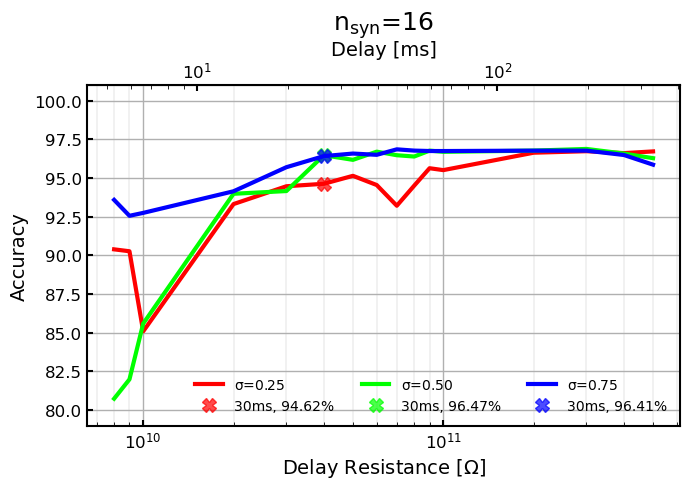

In [89]:
spk2del = lambda a: a * 0.66e-9
del2spk = lambda a: a / 0.66e-9

root = r'Results\accDelay'
dir = r'C:\Users\SD272961\Documents\Dendrites\Thesis'
f_pre = os.path.join(dir, root)
f_post = '16.npz'
sigmas = [0.25, 0.5, 0.75]
data33 = []
data42 = []
data69 = []
data97 = []
data98 = []
for s in sigmas:
    data33.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(s*100)) + f_post))['arr_0'])
    data42.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(s*100)) + f_post))['arr_1'])
    data69.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(s*100)) + f_post))['arr_2'])
    data97.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(s*100)) + f_post))['arr_3'])
    data98.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(s*100)) + f_post))['arr_4'])
acc_mean = [(data33[i] + data42[i] + data69[i] + data97[i] + data98[i]) / 5 for i in range(len(sigmas))]
acc = np.stack((data33, data42, data69, data97, data98), axis=1)
res = np.array([0, 1e9, 2e9, 3e9, 4e9, 5e9, 6e9, 7e9, 8e9, 9e9, 1e10, 2e10, 3e10, 4e10, 5e10, 6e10, 
                7e10, 8e10, 9e10, 1e11, 2e11, 3e11, 4e11, 5e11])  # ohm
red_blue_fade = list(Color("red").range_to(Color("blue"), len(sigmas)))
fig, ax = plt.subplots(figsize=(7, 5))
for i in range(len(sigmas)):
    ax.plot(res[8:], acc_mean[i][8:]*100, color=red_blue_fade[i].hex, lw=3, label=r'$\mathrm{\sigma}$=%.2f' % sigmas[i])
    ax.plot(res[res==4e10], acc_mean[i][res==4e10]*100, marker='X', markeredgecolor=red_blue_fade[i].hex, 
            label='30ms, %.2f%%' % (acc_mean[i][res==4e10]*100), alpha=0.7, markerfacecolor=red_blue_fade[i].hex, 
            ms=10, ls='None')
ax.legend(loc='lower right', frameon=False, ncol=3)
ax.set_xscale('log')
secaxf = ax.secondary_xaxis('top', functions=(spk2del, del2spk))
ax.grid(linewidth=1, which='major')
ax.grid(linewidth=0.25, which='minor')
secaxf.set_xlabel('Delay [ms]', fontsize=14)
ax.spines[:].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=4, direction='in')
ax.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
secaxf.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=4, direction='in')
secaxf.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
ax.set_xlabel(r'Delay Resistance [$\mathrm{\Omega}$]', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_ylim((79, 101))
ax.set_title(r'n$_\mathrm{syn}$=16', fontsize=18)
plt.tight_layout()

file_save = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Sup2\nsyn{0}.pdf'.format(int(16))
fig.savefig( file_save, transparent=True, dpi=300 )

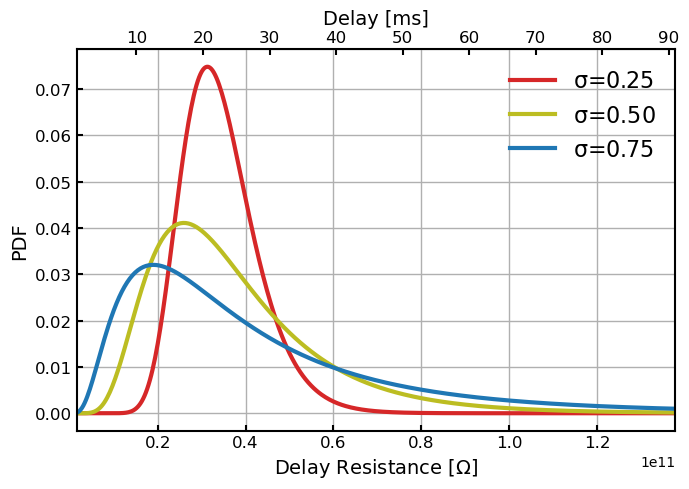

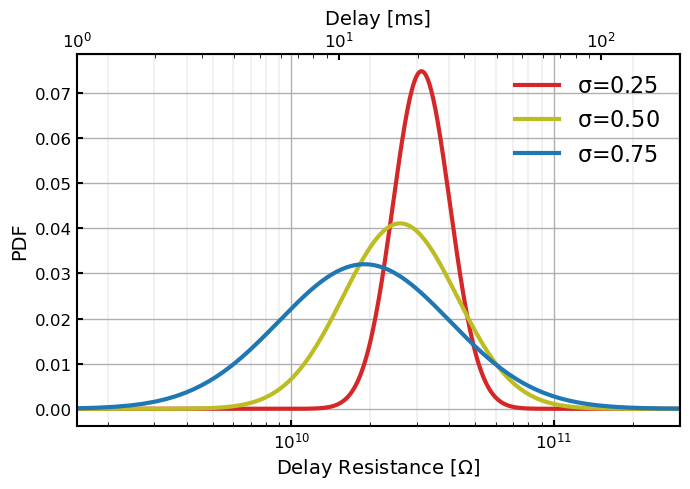

In [88]:
spk2del = lambda a: a * 0.66e-9
del2spk = lambda a: a / 0.66e-9

r_sigma = [0.25, 0.5, 0.75]
x = []
pdf = []
for s in r_sigma:
    r_mu = 22
    normal_std = np.sqrt(np.log(1 + (s / r_mu) ** 2))
    normal_mean = np.log(r_mu) - normal_std ** 2 / 2
    normal_std = s
    x.append(np.linspace(0.001, 200, num=1000))
    pdf.append((np.exp(-(np.log(x[-1]) - normal_mean) ** 2 / (2 * normal_std ** 2)) / (x[-1] * normal_std * np.sqrt(2 * np.pi))))

x2 = []
pdf2 = []
for s in r_sigma:
    r_mu = 80
    normal_std = np.sqrt(np.log(1 + (s / r_mu) ** 2))
    normal_mean = np.log(r_mu) - normal_std ** 2 / 2
    normal_std = s
    x2.append(np.linspace(0.001, 200, num=1000))
    pdf2.append((np.exp(-(np.log(x2[-1]) - normal_mean) ** 2 / (2 * normal_std ** 2)) / (x2[-1] * normal_std * np.sqrt(2 * np.pi))))
    
fig, ax = plt.subplots( figsize=(7, 5) )
red_blue_fade = ['tab:red', 'tab:olive', 'tab:blue']
orange_cyan_fade = ['tab:orange', 'tab:green', 'tab:cyan']
for i in range(len(r_sigma)):
    ax.plot(x[i]/0.66e-9, pdf[i], color=red_blue_fade[i], label=r'$\mathrm{\sigma}$=%.2f' % r_sigma[i], lw=3)
    # ax.plot(x2[i], pdf2[i], color=orange_cyan_fade[i], label=r'$\mathrm{\sigma}$=%.2f' % r_sigma[i], lw=3)
ax.legend(loc='upper right', frameon=False, fontsize=16)
# ax.set_xscale('log')
secaxf = ax.secondary_xaxis('top', functions=(spk2del, del2spk))
ax.grid(linewidth=1, which='major')
ax.grid(linewidth=0.25, which='minor')
secaxf.set_xlabel('Delay [ms]', fontsize=14)
ax.spines[:].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=4, direction='in')
ax.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
secaxf.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=4, direction='in')
secaxf.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
ax.set_xlabel(r'Delay Resistance [$\mathrm{\Omega}$]', fontsize=14)
ax.set_ylabel('PDF', fontsize=14)
ax.set_xlim((1/0.66e-9, 91/0.66e-9))

plt.tight_layout()

file_save = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Sup2\lognormal.pdf'
fig.savefig( file_save, transparent=True, dpi=300 )

fig, ax = plt.subplots( figsize=(7, 5) )
red_blue_fade = ['tab:red', 'tab:olive', 'tab:blue']
orange_cyan_fade = ['tab:orange', 'tab:green', 'tab:cyan']
for i in range(len(r_sigma)):
    ax.plot(x[i]/0.66e-9, pdf[i], color=red_blue_fade[i], label=r'$\mathrm{\sigma}$=%.2f' % r_sigma[i], lw=3)
    # ax.plot(x2[i], pdf2[i], color=orange_cyan_fade[i], label=r'$\mathrm{\sigma}$=%.2f' % r_sigma[i], lw=3)
ax.legend(loc='upper right', frameon=False, fontsize=16)
ax.set_xscale('log')
secaxf = ax.secondary_xaxis('top', functions=(spk2del, del2spk))
ax.grid(linewidth=1, which='major')
ax.grid(linewidth=0.25, which='minor')
secaxf.set_xlabel('Delay [ms]', fontsize=14)
ax.spines[:].set_linewidth(1.5)
ax.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=4, direction='in')
ax.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
secaxf.tick_params(axis='both', which='major', labelsize=12, width=1.5, length=4, direction='in')
secaxf.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
ax.set_xlabel(r'Delay Resistance [$\mathrm{\Omega}$]', fontsize=14)
ax.set_ylabel('PDF', fontsize=14)
ax.set_xlim((1/0.66e-9, 200/0.66e-9))
plt.tight_layout()

file_save = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Sup2\lognormal_logx.pdf'
fig.savefig( file_save, transparent=True, dpi=300 )

[81.18 91.67 92.69 95.87 94.58 95.4 ]
[89.9   95.396 95.858 96.466 96.14  96.548]
[93.64 96.82 97.09 96.82 97.7  97.43]


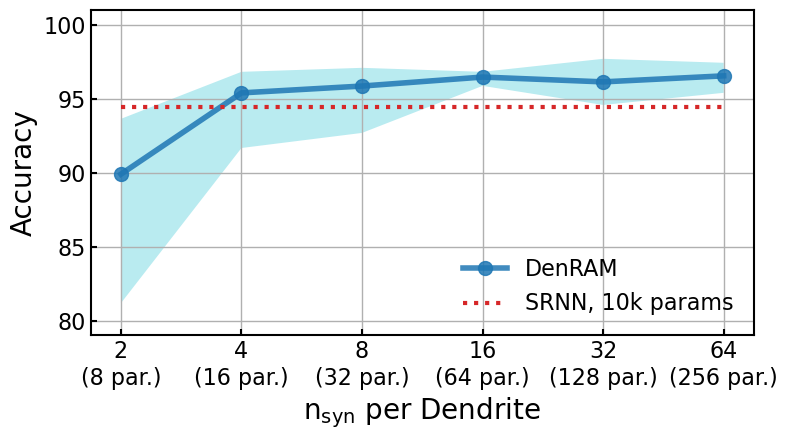

In [103]:
spk2del = lambda a: a * 0.66e-9
del2spk = lambda a: a / 0.66e-9

SRNN = 94.437
root = r'Results\accDelay'
dir = r'C:\Users\SD272961\Documents\Dendrites\Thesis'
f_pre = os.path.join(dir, root)
sigma = 0.5
f_posts = ['2.npz', '4.npz', '8.npz', '16.npz', '32.npz', '64.npz']
data33 = []
data42 = []
data69 = []
data97 = []
data98 = []
for p in f_posts:
    data33.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_0'])
    data42.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_1'])
    data69.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_2'])
    data97.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_3'])
    data98.append(np.load(os.path.join(f_pre, 'fromData0d{0}_'.format(int(sigma*100)) + p))['arr_4'])
acc_mean = [(data33[i] + data42[i] + data69[i] + data97[i] + data98[i]) / 5 for i in range(len(f_posts))]
acc_tot = np.stack((data33, data42, data69, data97, data98), axis=1)
res = np.array([0, 1e9, 2e9, 3e9, 4e9, 5e9, 6e9, 7e9, 8e9, 9e9, 1e10, 2e10, 3e10, 4e10, 5e10, 6e10, 
                7e10, 8e10, 9e10, 1e11, 2e11, 3e11, 4e11, 5e11])  # ohm
nsyn = ['2\n(8 par.)', '4\n(16 par.)', '8\n(32 par.)', '16\n(64 par.)', '32\n(128 par.)', '64\n(256 par.)']
fig, ax = plt.subplots(figsize=(8, 4.5))
acc = []
acc_min = []
acc_max = []
for i in range(len(nsyn)):
    acc.append(acc_mean[i][res==4e10]*100)
    acc_min.append(acc_tot[i].min(axis=0)[res==4e10]*100)
    acc_max.append(acc_tot[i].max(axis=0)[res==4e10]*100)
acc_min = np.array(acc_min).squeeze()
acc_max = np.array(acc_max).squeeze()
print(acc_min)
print(np.array(acc).squeeze())
print(acc_max)
ax.plot(np.arange(len(acc)), acc, color='tab:blue', label=r'DenRAM', marker='o', markeredgecolor='tab:blue', 
        markerfacecolor='tab:blue', ms=10, alpha=0.85, lw=4)
ax.fill_between(np.arange(len(acc)), acc_min, acc_max, color='tab:cyan', alpha=0.3, lw=1.5, edgecolor='none')
ax.plot(np.arange(len(acc)), [SRNN]*len(acc), color='tab:red', label=r'SRNN, 10k params', ls=':', lw=3)

ax.legend(loc='lower right', frameon=False, fontsize=16)
# ax.set_xscale('log')
ax.grid(linewidth=1, which='major')
ax.grid(linewidth=0.25, which='minor')
ax.spines[:].set_linewidth(1.5)
ax.set_xticks(np.arange(len(acc)), labels=nsyn)
ax.tick_params(axis='both', which='major', labelsize=16, width=1.5, length=4, direction='in')
ax.tick_params(axis='both', which='minor', labelsize=0, size=3, direction='in')
ax.set_xlabel(r'n$_\mathrm{syn}$ per Dendrite', fontsize=20)
ax.set_ylabel('Accuracy', fontsize=20)
ax.set_ylim((79, 101))
# ax.set_title(r'$\mathrm{\sigma}$=%.2f' % sigma, fontsize=18)
plt.tight_layout()

file_save = r'C:\Users\SD272961\Documents\Dendrites\Images\NatComm\Figure4\hw.pdf'
fig.savefig( file_save, transparent=True, dpi=300 )